Import Packages

In [14]:
import os
import pickle
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Get factor dictionaries

In [15]:
factor_dict_dir_path = Path("Cif/Materials3/Factor_Dictionary")
os.listdir(factor_dict_dir_path)

['AlCo_factor_dict.pkl',
 'AlCuS2_factor_dict.pkl',
 'CoS2_factor_dict.pkl',
 'Cr2O3_factor_dict.pkl',
 'CrB_factor_dict.pkl',
 'CrF4_factor_dict.pkl',
 'CrPbO4_factor_dict.pkl',
 'CsBaVS4_factor_dict.pkl',
 'CuH2SO5_factor_dict.pkl',
 'ErVO4_factor_dict.pkl',
 'Fe2O3_factor_dict.pkl',
 'FeSi2_factor_dict.pkl',
 'K2ZnF4_factor_dict.pkl',
 'KZnSb_factor_dict.pkl',
 'LaNiAs_factor_dict.pkl',
 'LaScSb_factor_dict.pkl',
 'Li3CuO3_factor_dict.pkl',
 'LiMnP_factor_dict.pkl',
 'MgCrO4_factor_dict.pkl',
 'MnBr2_factor_dict.pkl',
 'MnO_factor_dict.pkl',
 'MnPd3_factor_dict.pkl',
 'MnPO4_factor_dict.pkl',
 'Na3NiF6_factor_dict.pkl',
 'NaFeF4_factor_dict.pkl',
 'NbCoSi_factor_dict.pkl',
 'NdFeO3_factor_dict.pkl',
 'NdNiP_factor_dict.pkl',
 'NiO_factor_dict.pkl',
 'ScGa3_factor_dict.pkl',
 'ScSiIr_factor_dict.pkl',
 'Sr2CuO3_factor_dict.pkl',
 'SrCrF4_factor_dict.pkl',
 'SrTiN2_factor_dict.pkl',
 'TbCoGe2_factor_dict.pkl',
 'TiGa_factor_dict.pkl',
 'TiNiAs_factor_dict.pkl',
 'TmNiC2_factor_dict.pk

Explore Data


In [16]:
# CoS2 Factor Dictionaries

with open(factor_dict_dir_path / 'CoS2_factor_dict.pkl', 'rb') as file:
    CoS2 = pickle.load(file)
print(CoS2.keys())

for key, val in CoS2.items():
    print(key, val)

dict_keys(['Material', 'steinhart_vector', 'steinhart_parameter_sum', 'band_gap', 'oxidation_state', 'possible_species', 'density', 'quadrupole moment', 'quadrupole moment normalized'])
Material CoS2
steinhart_vector ([0.010993949730895503, 0.009206915781744145, 0.006073948522417767, 0.0023723577591867346, 0.0012217825367681883, 0.0035680779343516206, 0.004495674459032175, 0.003968184692799936, 0.0026194640976982078, 0.002441813081451206, 0.004095638128681833], 'CoS2')
steinhart_parameter_sum 0.05105780672502731
band_gap 0.0
oxidation_state 4
possible_species ['Co4+', 'S2-']
density 4.849095401441955
quadrupole moment [[-130.29741349  -72.89691717  -72.89691717]
 [ -72.89691717 -130.29741349  -72.89691717]
 [ -72.89691717  -72.89691717 -130.29741349]]
quadrupole moment normalized [[-8.14358834 -4.55605732 -4.55605732]
 [-4.55605732 -8.14358834 -4.55605732]
 [-4.55605732 -4.55605732 -8.14358834]]


Material Dictionary Formatting

In [17]:
data_list = []

for file_path in factor_dict_dir_path.glob('*.pkl'):
    with open(file_path, 'rb') as file:
        material_dict = pickle.load(file)

        # Extract individual values, keeping only numerical stuff
        material = material_dict['Material']
        steinhart_vector = material_dict['steinhart_vector'][0]  # Just the vector, ignoring the material name
        steinhart_param_sum = material_dict['steinhart_parameter_sum']
        band_gap = material_dict['band_gap']
        oxidation_state = material_dict['oxidation_state']
        possible_species = len(material_dict['possible_species'])
        density = material_dict['density']
        quadrupole_moment = np.array(material_dict['quadrupole moment']).flatten()  # Flatten matrix to vector
        quadrupole_moment_norm = np.array(material_dict['quadrupole moment normalized']).flatten()
        # Combine all the features into a single row (list)
        data_row = [
            material,
            *steinhart_vector,  # Unpack vector values
            steinhart_param_sum,
            band_gap,
            oxidation_state,
            possible_species,
            density,
            *quadrupole_moment,  # Unpack matrix values
            *quadrupole_moment_norm  # Unpack normalized matrix values
        ]
        
        data_list.append(data_row)

print(quadrupole_moment)

# Define the column names
columns = ['Material'] + [f"ST {i}" for i in range(11)] # Steinhart vector values from 0 to 10
columns += ['Steinhart Parameter Sum', 'band_gap', 'oxidation_state', 'possible_species', 'density']
columns += [f'QM {i}' for i in range(9)] # Flattened quadrupole matrix
columns += [f'QM Norm {i}' for i in range(9)] # Flattened quadrupole matrix (normalized)

print(columns)

factor_df = pd.DataFrame(data_list, columns=columns)
factor_df.set_index('Material', inplace=True)

print(factor_df)

[-21.76029082 -12.56330976   8.88643906 -12.56330976  -7.25343027
   5.13058798   8.88643906   5.13058798 -14.51573914]
['Material', 'ST 0', 'ST 1', 'ST 2', 'ST 3', 'ST 4', 'ST 5', 'ST 6', 'ST 7', 'ST 8', 'ST 9', 'ST 10', 'Steinhart Parameter Sum', 'band_gap', 'oxidation_state', 'possible_species', 'density', 'QM 0', 'QM 1', 'QM 2', 'QM 3', 'QM 4', 'QM 5', 'QM 6', 'QM 7', 'QM 8', 'QM Norm 0', 'QM Norm 1', 'QM Norm 2', 'QM Norm 3', 'QM Norm 4', 'QM Norm 5', 'QM Norm 6', 'QM Norm 7', 'QM Norm 8']
              ST 0      ST 1          ST 2      ST 3      ST 4      ST 5  \
Material                                                                   
AlCo      0.031504  0.031504  3.150423e-02  0.031504  0.031504  0.031504   
AlCuS2    0.010278  0.008792  6.202792e-03  0.003398  0.002787  0.004635   
CoS2      0.010994  0.009207  6.073949e-03  0.002372  0.001222  0.003568   
Cr2O3     0.042921  0.029984  1.648971e-02  0.012966  0.012229  0.016532   
CrB       0.092058  0.068176  6.214224e-02  

Get rid of factor distionaries that did not process completely 

In [18]:
# Identify columns with prefixes "QM", "QM Norm", or "ST"
columns_to_check = [col for col in factor_df.columns if col.startswith("QM") or col.startswith("QM Norm") or col.startswith("ST")]

# Create a mask for rows that have NaN in any of the specified columns
nan_mask = factor_df[columns_to_check].isna().any(axis=1)

# Separate rows with NaN values into the "failed" DataFrame
failed_df = factor_df[nan_mask]

# Keep rows without NaN values in the original DataFrame
factor_df = factor_df[~nan_mask]

# Output the DataFrames to confirm
print("Cleaned DataFrame (no NaN in specified columns):")
print(factor_df)

print("\nFailed DataFrame (rows with NaN in specified columns):")
print(failed_df)


Cleaned DataFrame (no NaN in specified columns):
              ST 0      ST 1          ST 2      ST 3      ST 4      ST 5  \
Material                                                                   
AlCuS2    0.010278  0.008792  6.202792e-03  0.003398  0.002787  0.004635   
CoS2      0.010994  0.009207  6.073949e-03  0.002372  0.001222  0.003568   
Cr2O3     0.042921  0.029984  1.648971e-02  0.012966  0.012229  0.016532   
CrB       0.092058  0.068176  6.214224e-02  0.059226  0.048838  0.051468   
CrF4      0.041761  0.016696  8.604780e-03  0.014645  0.030750  0.014935   
CrPbO4    0.075711  0.001022  3.375536e-03  0.056248  0.038469  0.006866   
CsBaVS4   0.028977  0.000587  6.040823e-04  0.021565  0.014762  0.001600   
CuH2SO5   0.026970  0.021802  1.458029e-02  0.009843  0.008528  0.008023   
ErVO4     0.033481  0.028878  2.230315e-02  0.018138  0.018246  0.019401   
Fe2O3     0.042079  0.029416  1.631405e-02  0.012791  0.011982  0.016237   
K2ZnF4    0.047451  0.028071  7.491873e

Calculate Pearsons Correlation Matrix

In [24]:
factor_df_corr = factor_df.corr(method='pearson', min_periods=1, numeric_only=False)

Convert data frame to Csv

In [25]:
file_name = "factor_df.csv"

try:
        factor_df_corr.to_csv(file_name, index=False)
        print(f"DataFrame saved as '{file_name}' successfully.")
except Exception as e:
        print(f"An error occurred: {e}")

DataFrame saved as 'factor_df.csv' successfully.


Plot as diverging color map

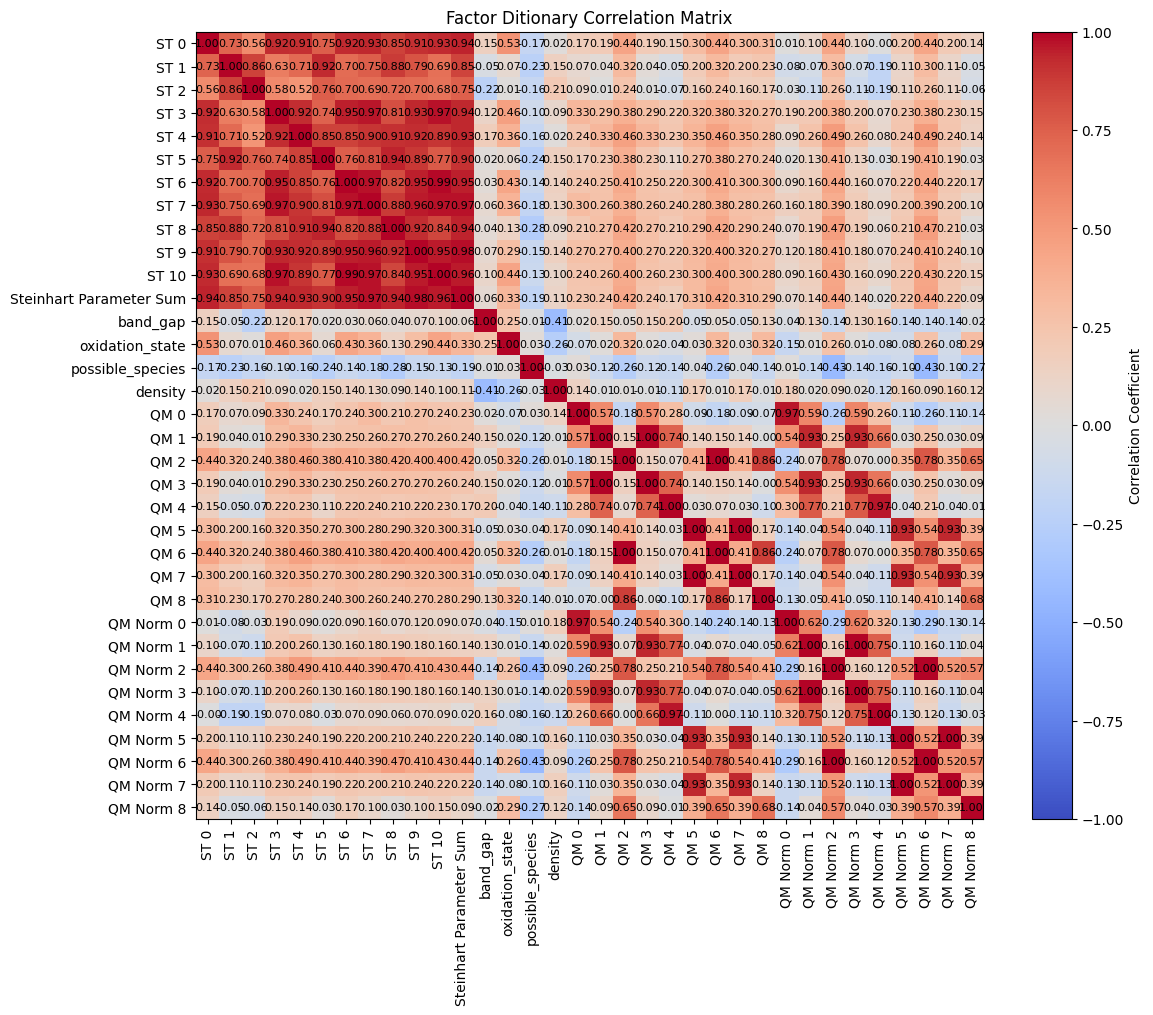

In [27]:
# Plot the correlation matrix using a diverging color map
plt.figure(figsize=(12, 10))
plt.imshow(factor_df_corr, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(label='Correlation Coefficient')

# Add labels
plt.xticks(range(len(factor_df_corr.columns)), factor_df_corr.columns, rotation=90)
plt.yticks(range(len(factor_df_corr.columns)), factor_df_corr.columns)
plt.title('Factor Ditionary Correlation Matrix')

# Display values in the cells
for i in range(len(factor_df_corr.columns)):
    for j in range(len(factor_df_corr.columns)):
        plt.text(j, i, f"{factor_df_corr.iloc[i, j]:.2f}", ha='center', va='center', color='black', fontsize=8)

plt.tight_layout()
plt.show()